<div style="background-color: #3498db; color: white; text-align: center; padding: 50px;">
    <h1>IMPLEMENTATION DE Support Vector Machine SUR UNE BASE DE DONNÉES DU CANCER</h1>
    <h4>Préparé par : HAFDAOUI Hamza & AMGAROU Salma & EL JAYI Chaimae</h4>
    <h4>Encadré par : Pr. Abdellah AZMANI & Loubna BOUHSAIEN</h4>
</div>


# 1.Introduction to SVM (Support Vector Machine)



Les SVM fonctionnent en cartographiant les données dans un espace de caractéristiques de haute dimension afin que les points de données puissent être catégorisés, même lorsque les données ne sont pas linéairement séparables autrement. Un séparateur entre les catégories est trouvé, puis les données sont transformées de telle manière que le séparateur puisse être représenté comme un hyperplan. Ensuite, les caractéristiques des nouvelles données peuvent être utilisées pour prédire le groupe auquel un nouvel enregistrement devrait appartenir.

### Objectif des SVM

L'objectif de l'algorithme SVM est de créer la meilleure ligne ou frontière de décision capable de séparer l'espace en n dimensions en classes afin que nous puissions facilement placer le nouveau point de données dans la bonne catégorie à l'avenir. Cette meilleure frontière de décision est appelée un hyperplan.

# 2. Imports les bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns 

# 3. des informations sur data
Chaque enregistrement contient les valeurs d'un ensemble de caractéristiques cellulaires. Les champs de chaque enregistrement sont :

|Field name|Description|
| --- | --- |
|ID|Identifier|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|benign or malignant|

Dans cet exemple, nous utilisons un ensemble de données qui comporte 10 prédicteurs (colonnes) dans chaque enregistrement, pour un total de 700 enregistrements (lignes).

### row = record(enregistrement)
### columns = attribute, dimension
### target = prediction

# 4.Charge les donnees

In [3]:
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

# 5.Distribution des classes

In [5]:
benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==4][0:200]


In [6]:
benign_df.shape

(200, 11)

In [7]:
malignant_df.shape

(200, 11)

<Axes: xlabel='Clump', ylabel='UnifSize'>

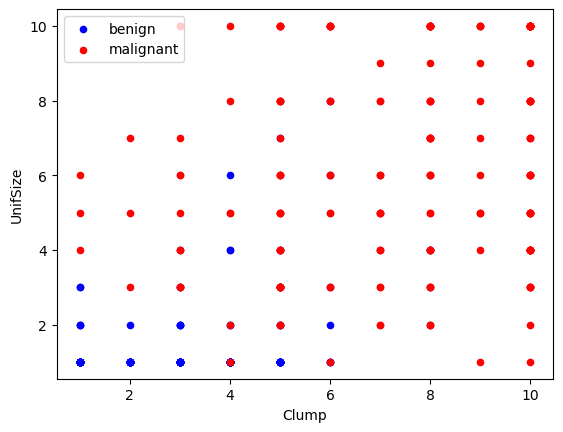

In [8]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label= 'benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label = 'malignant', ax=axes)

#help(benign_df.plot)

# 6.Identification des lignes indésirables

In [9]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

### Il semble que la colonne BareNuc contienne des valeurs qui ne sont pas numériques.

In [10]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

In [11]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
#the independent variables 
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [13]:
#the target or the dependent variable 
Y = np.asarray(df['Class'])
Y[0:5]

array([2, 2, 2, 2, 2])

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

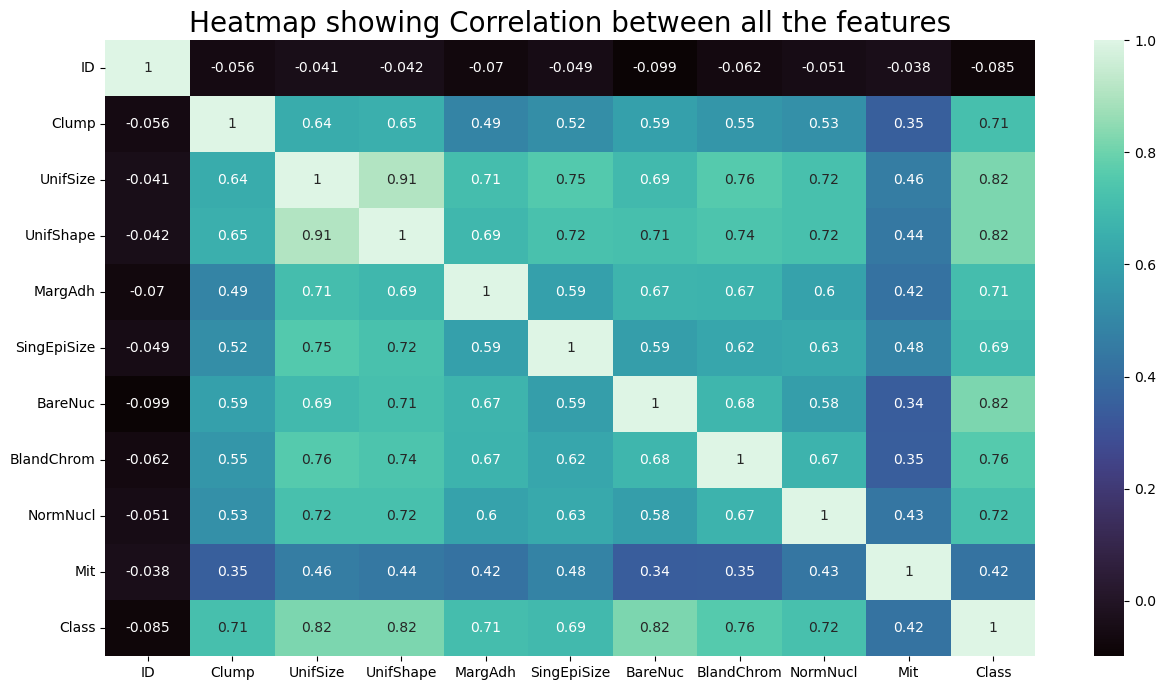

In [14]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')


# 7.Diviser les données Train/Test dataset

In [15]:
'''
df ---> Train/Test
Train(X,Y) ##X itself is a 2D array , Y is 1D
test(X,Y)
'''
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# 8.Modeling(SVM with Scikit-learn)

L'algorithme SVM propose un choix de fonctions de noyau pour effectuer son traitement. Fondamentalement, la transformation des données dans un espace de dimensions supérieures est appelée noyau. La fonction mathématique utilisée pour la transformation est appelée fonction de noyau(kerne) et peut être de différents types, tels que :

    1. Linear
    2. Polynomial
    3. Radial basis function (RBF) 
    4.Sigmoid
    
Chacune de ces fonctions a ses caractéristiques, ses avantages et ses inconvénients, ainsi que son équation. Cependant, comme il n'y a pas de moyen facile de savoir quelle fonction donne les meilleurs résultats avec un ensemble de données donné, nous choisissons généralement différentes fonctions à tour de rôle et comparons les résultats. Utilisons simplement la fonction par défaut, RBF (Radial Basis Function), pour ce lab.

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel='linear', gamma='auto', C=2) #Utilisation de C=2 pour une pénalité modérée en cas de mauvaise classification, visant à obtenir une frontière de décision équilibrée.
classifier.fit(X_train, Y_train)
y_predict = classifier.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(Y_test, y_predict)))

Model accuracy : 0.964


<Axes: >

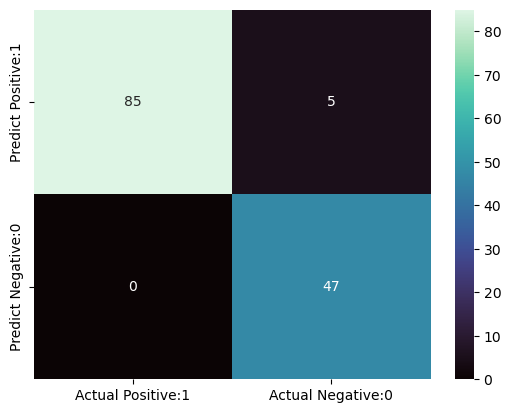

In [17]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, y_predict)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# 9.Evaluation(resultat)

In [20]:
from sklearn.metrics import classification_report
print( confusion_matrix(Y_test,y_predict))
print('-----------------')
print(classification_report(Y_test,y_predict))

[[85  5]
 [ 0 47]]
-----------------
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

